In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

voice = pd.read_csv("voice.csv")

# Replacing label column with a binary for whether or not voice belongs to male
voice['male'] = np.where(voice['label'] == 'male',1,0)
voice = voice.drop('label',axis=1)

voice.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


#### First, let's create a logistic regression model.
Starting with a generalized model with all features --

In [2]:
log_reg = LogisticRegression(C=9e15)

y = voice['male']
x = voice.drop('male',axis=1)

test_accuracies = cross_val_score(log_reg,x,y,cv=10)
mean_accuracy = test_accuracies.mean()

print(test_accuracies)
print("Mean Accuracy of Model: {}".format(mean_accuracy))

[ 0.91194969  0.96855346  0.9591195   0.96540881  0.96202532  0.98734177
  0.98417722  0.9778481   0.94936709  0.98417722]
Mean Accuracy of Model: 0.9649968155401641


Now trying some feature selection to combat any overfitting...

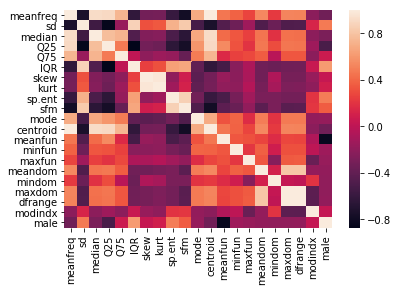

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,male
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


In [3]:
correlations = voice.corr()
h = sns.heatmap(correlations)
plt.show()
correlations

In [4]:
h = sns.pairplot(voice)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


There do seem to be several variables that have medium to strong correlations with one another, so let's see what PCA does to improve the cross validation.

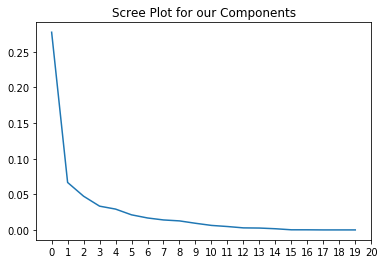

Percent of variance explained by component 
 [0.50779228659921016, 0.12190298129034158, 0.086562450625897763, 0.061035321596409842, 0.053497894220141028, 0.038744411834353759, 0.030699063287090381, 0.025599600255230295, 0.023177854180512637, 0.01706342612449762, 0.011573156750404974, 0.0087121606195822866, 0.0052350697733010145, 0.0048028935477510736, 0.0030122268144629903, 0.00030814939480620744, 0.00028105308600636649, 2.7409255048594506e-18, 5.2035782606707467e-23, 1.1553850927956605e-34]

 Eigenvalues: [0.2775498076921315, 0.066629899482770982, 0.047313423536778323, 0.033360770178223698, 0.02924095273714469, 0.021176974006021376, 0.016779536311439833, 0.013992264780978382, 0.012668583474555588, 0.009326550962679734, 0.0063256719631920267, 0.0047619047558643754, 0.002861391650049627, 0.0026251721731965416, 0.0016464270827712593, 0.00016842872080964494, 0.00015361838301005112, 1.4981388391443562e-18, 2.8441789756842839e-23, 6.3151197601568659e-35]


In [5]:
# Let's try PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

sklearn_pca = PCA(n_components=20)

pca_feat = x
x_normalized = MinMaxScaler().fit_transform(pca_feat)
x_PCA = sklearn_pca.fit_transform(x_normalized)
var_ratios = (list(sklearn_pca.explained_variance_ratio_))
component_variances = (list(sklearn_pca.explained_variance_))

# Performing a scree plot to decide which ones to keep
sorted_eigenvals = sorted(component_variances,reverse=True)
plt.plot(sorted_eigenvals)
plt.title("Scree Plot for our Components")
plt.xticks(np.arange(0, 21, 1.0))
plt.show()

print('Percent of variance explained by component \n',var_ratios)
print('\n Eigenvalues: {}'.format(sorted_eigenvals))

The heuristic rules we know would indicate that we should pick 3 or 4 components for our analysis, but since we have cross validation at our disposal, we might as well see which model results in the highest possible mean accuracy across our folds and stick with that.

PCA_Components  Mean Cross Fold Accuracy
             1                  0.681084
             2                  0.805097
             3                  0.814601
             4                  0.817427
             5                  0.904761
             6                  0.944180
             7                  0.949210
             8                  0.965936
             9                  0.967200
            10                  0.966884
            11                  0.967520
            12                  0.967520
            13                  0.966575
            14                  0.967519
            15                  0.965307
            16                  0.964993
            17                  0.965624
            18                  0.965624
            19                  0.965624
            20                  0.965624


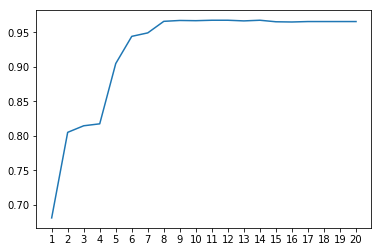

In [6]:
log_reg = LogisticRegression(C=9e15)

components_to_use = np.arange(1,21)
mean_accuracies = []

# Looping all outputs for different PCA thresholds
for num in components_to_use:
    
    voice_pca = pd.DataFrame(x_PCA[:,0:num])

    y = voice['male']
    x = voice_pca

    test_accuracies = cross_val_score(log_reg,x,y,cv=10)
    mean_accuracy = test_accuracies.mean()
    mean_accuracies = np.append(mean_accuracies,mean_accuracy)

pca_accuracy_df = pd.DataFrame({'PCA_Components':components_to_use,'Mean Cross Fold Accuracy':mean_accuracies})
pca_accuracy_df = pca_accuracy_df[['PCA_Components','Mean Cross Fold Accuracy']]

plt.plot(components_to_use,mean_accuracies)
plt.xticks(components_to_use)

print(pca_accuracy_df.iloc[:,0:2].to_string(index=False))

The best PCA features mildly increase the predictive value of the model. It seems like 9 features is the best option, beyond which there is virtually no increase in predictive power as we add components.

#### Then, let's create a ridge regression model.
Starting with all of the features and the default ridge classification settings.

In [9]:
ridge_reg = LogisticRegression(penalty='l2')

y = voice['male']
x = voice.drop('male',axis=1)

test_accuracies = cross_val_score(ridge_reg,x,y,cv=10)
mean_accuracy = test_accuracies.mean()

print(test_accuracies)
print("Mean Accuracy of Model: {}".format(mean_accuracy))

[ 0.66666667  0.90251572  0.81761006  0.95597484  0.87025316  0.98417722
  0.98101266  0.96835443  0.90189873  0.89556962]
Mean Accuracy of Model: 0.8944033118382295


In [51]:
y = voice['male']
x = voice.drop('male',axis=1)

c_vals = np.arange(0.1,50,0.1)
mean_accuracies = []
accuracy_stds = []

for c in c_vals:
    ridge_reg = LogisticRegression(penalty='l2',C=c)
    
    test_accuracies = cross_val_score(ridge_reg,x,y,cv=10)
    mean_accuracy = test_accuracies.mean()
    std = test_accuracies.std()
    
    accuracy_stds = np.append(accuracy_stds,std)
    mean_accuracies = np.append(mean_accuracies,mean_accuracy)

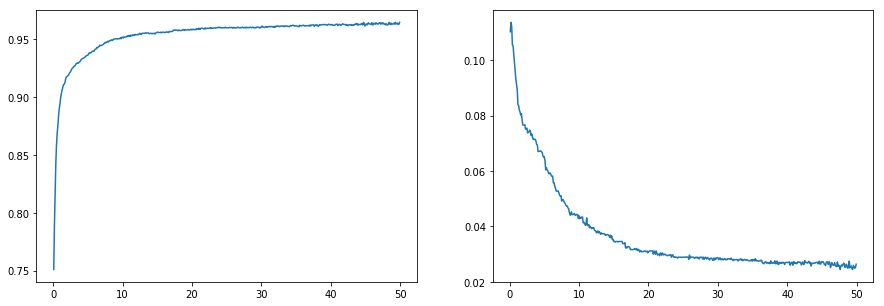

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
f.set_figheight(5)
f.set_figwidth(15)
ax1.plot(c_vals,mean_accuracies)
ax2.plot(c_vals,accuracy_stds)
plt.show()

It looks like the model starts to perform better as the strength of the regularization declines (C becomes greater). In other words, it seems to perform better the less it tries to moderate coefficients and the more similar it becomes to logistic regression. The accuracy with a high C Value (low regularization) is similar, unsurprisingly, to what we get from our vanilla logistic regression model, but is still slightly inferior to the PCA version.

#### Lastly, a lasso regression model
Starting with a vanilla version including all features.

In [8]:
log_reg = LogisticRegression(penalty='l1')

y = voice['male']
x = voice.drop('male',axis=1)

test_accuracies = cross_val_score(log_reg,x,y,cv=10)
mean_accuracy = test_accuracies.mean()

print(test_accuracies)
print("Mean Accuracy of Model: {}".format(mean_accuracy))

[ 0.90566038  0.98113208  0.96540881  0.97169811  0.96202532  0.98734177
  0.98417722  0.98417722  0.94620253  0.98734177]
Mean Accuracy of Model: 0.9675165193853992


In [67]:
y = voice['male']
x = voice.drop('male',axis=1)

c_vals = np.arange(1,50,1)
mean_accuracies = []
accuracy_stds = []

for c in c_vals:
    lasso_reg = LogisticRegression(penalty='l1',C=c)
    
    test_accuracies = cross_val_score(ridge_reg,x,y,cv=10)
    mean_accuracy = test_accuracies.mean()
    std = test_accuracies.std()
    
    accuracy_stds = np.append(accuracy_stds,std)
    mean_accuracies = np.append(mean_accuracies,mean_accuracy)

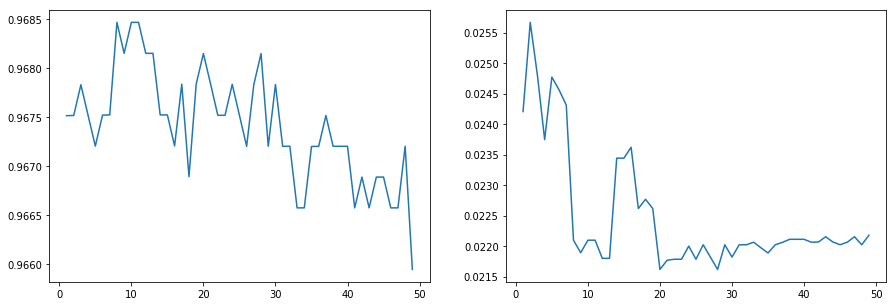

In [68]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
f.set_figheight(5)
f.set_figwidth(15)
ax1.plot(c_vals,mean_accuracies)
ax2.plot(c_vals,accuracy_stds)
plt.show()

In [84]:
for c, acc in zip(c_vals,mean_accuracies):
    print (c,' - ',acc)

1  -  0.967516519385
2  -  0.967518509673
3  -  0.967832975082
4  -  0.967518509673
5  -  0.967206034551
6  -  0.967522490248
7  -  0.967524480535
8  -  0.968469867049
9  -  0.968153411353
10  -  0.968469867049
11  -  0.968469867049
12  -  0.968153411353
13  -  0.968153411353
14  -  0.967524480535
15  -  0.967524480535
16  -  0.967208024839
17  -  0.967838945944
18  -  0.96689355943
19  -  0.967838945944
20  -  0.968151421065
21  -  0.967838945944
22  -  0.96752049996
23  -  0.96752049996
24  -  0.967836955656
25  -  0.96752049996
26  -  0.967204044264
27  -  0.967834965369
28  -  0.968151421065
29  -  0.967204044264
30  -  0.967834965369
31  -  0.967204044264
32  -  0.967204044264
33  -  0.966575113446
34  -  0.966575113446
35  -  0.967202053977
36  -  0.967204044264
37  -  0.967518509673
38  -  0.967204044264
39  -  0.967204044264
40  -  0.967204044264
41  -  0.966575113446
42  -  0.966889578855
43  -  0.966575113446
44  -  0.966889578855
45  -  0.966889578855
46  -  0.966575113446
4

For our lasso regression, the progression of the impact of different regularization parameters is less clear. The best model is the one with C=10, which has an accuracy of 0.968 and is consistent across folds (a low std of accuracies). This is actually the most accurate of all of our models by a slight margin, but is slower than our PCA regression if speed were an issue (see below).

I think the reason that logistic regression performs so well relative to ridge and lasso is that most of the features as currently constructed, while having multicollinearity, all have complex and unique relationships with the outcome variable. So reducing the strength of their coefficients is only so useful.

I didn't really have time to do much feature manipulation, but the performance of ridge and lasso classifiers could potentially be increased even more by adding additional features and modifying existing ones, whereas the logistic regression might suffer in its accuracy by adding more complexity.

In [85]:
lasso_reg = LogisticRegression(penalty='l1',C=10)
lasso_reg.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
voice_pca = pd.DataFrame(x_PCA[:,0:10])
y = voice['male']
x_logit = voice_pca

log_reg = LogisticRegression(C=9e15)
log_reg.fit(x_logit,y)

LogisticRegression(C=9000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [88]:
import time
#timer
start_time = time.time()

#make predictions
lasso_reg.predict(x)

# Outputting the time to run
print("\n--- Time to run: %s seconds ---" % (time.time() - start_time))


--- Time to run: 0.02499985694885254 seconds ---


In [90]:
import time
#timer
start_time = time.time()

#make predictions
log_reg.predict(x_logit)

# Outputting the time to run
print("\n--- Time to run: %s seconds ---" % (time.time() - start_time))


--- Time to run: 0.0010001659393310547 seconds ---


In [82]:
print(coords)

[array([[ 1,  2,  3, ..., 47, 48, 49],
       [ 1,  2,  3, ..., 47, 48, 49],
       [ 1,  2,  3, ..., 47, 48, 49],
       ..., 
       [ 1,  2,  3, ..., 47, 48, 49],
       [ 1,  2,  3, ..., 47, 48, 49],
       [ 1,  2,  3, ..., 47, 48, 49]]), array([[ 0.96751652,  0.96751652,  0.96751652, ...,  0.96751652,
         0.96751652,  0.96751652],
       [ 0.96751851,  0.96751851,  0.96751851, ...,  0.96751851,
         0.96751851,  0.96751851],
       [ 0.96783298,  0.96783298,  0.96783298, ...,  0.96783298,
         0.96783298,  0.96783298],
       ..., 
       [ 0.96657511,  0.96657511,  0.96657511, ...,  0.96657511,
         0.96657511,  0.96657511],
       [ 0.96720404,  0.96720404,  0.96720404, ...,  0.96720404,
         0.96720404,  0.96720404],
       [ 0.96594618,  0.96594618,  0.96594618, ...,  0.96594618,
         0.96594618,  0.96594618]])]
